### AttritionForecast: Analysis and Predictionn

#### Project Overview
This project focuses on analyzing employee attrition and building predictive models to forecast future attrition rates. By understanding the factors influencing employee turnover, we aim to provide actionable insights to improve employee retention strategies.

#### Dataset Description
The dataset includes various features such as employee demographics, job roles, compensation, performance, and other relevant attributes. It provides a comprehensive view of the factors that may contribute to employee turnover.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
DF = pd.read_csv('Attrition Dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv')


In [2]:
DF

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
# data information
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

We observe that object-type features are present, which need to be labeled and converted to numerical data. 
This will be addressed in a later section. Our dataset consists of 1470 records and 35 features, with 26 being numerical and 9 categorical.
The target variable, Attrition, is binary.

# 1. Data Preprocessing and Cleaning 

## 1.1 Data Exploration:

In [4]:
#Summary Statistics:
print("Summary Statistics:")
round(DF.describe().T,2)

Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.92,9.14,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.49,403.51,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.19,8.11,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.91,1.02,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.00,0.00,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.87,602.02,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.72,1.09,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.89,20.33,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.73,0.71,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.06,1.11,1.0,1.00,2.0,3.00,5.0


The minimum age is 18, indicating that all employees are adults.
Therefore, the Over18 attribute is unnecessary for our analysis.
The standard deviation of EmployeeCount and StandardHours is 0.00, indicating uniform values in these attributes.
The EmployeeNumber attribute represents a unique identifier for each employee and does not provide meaningful insights.
Consequently, we can drop these attributes from our analysis

In [5]:
#Identify Missing Values:
print("\nDataset Information:")
print(DF.info())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  Jo

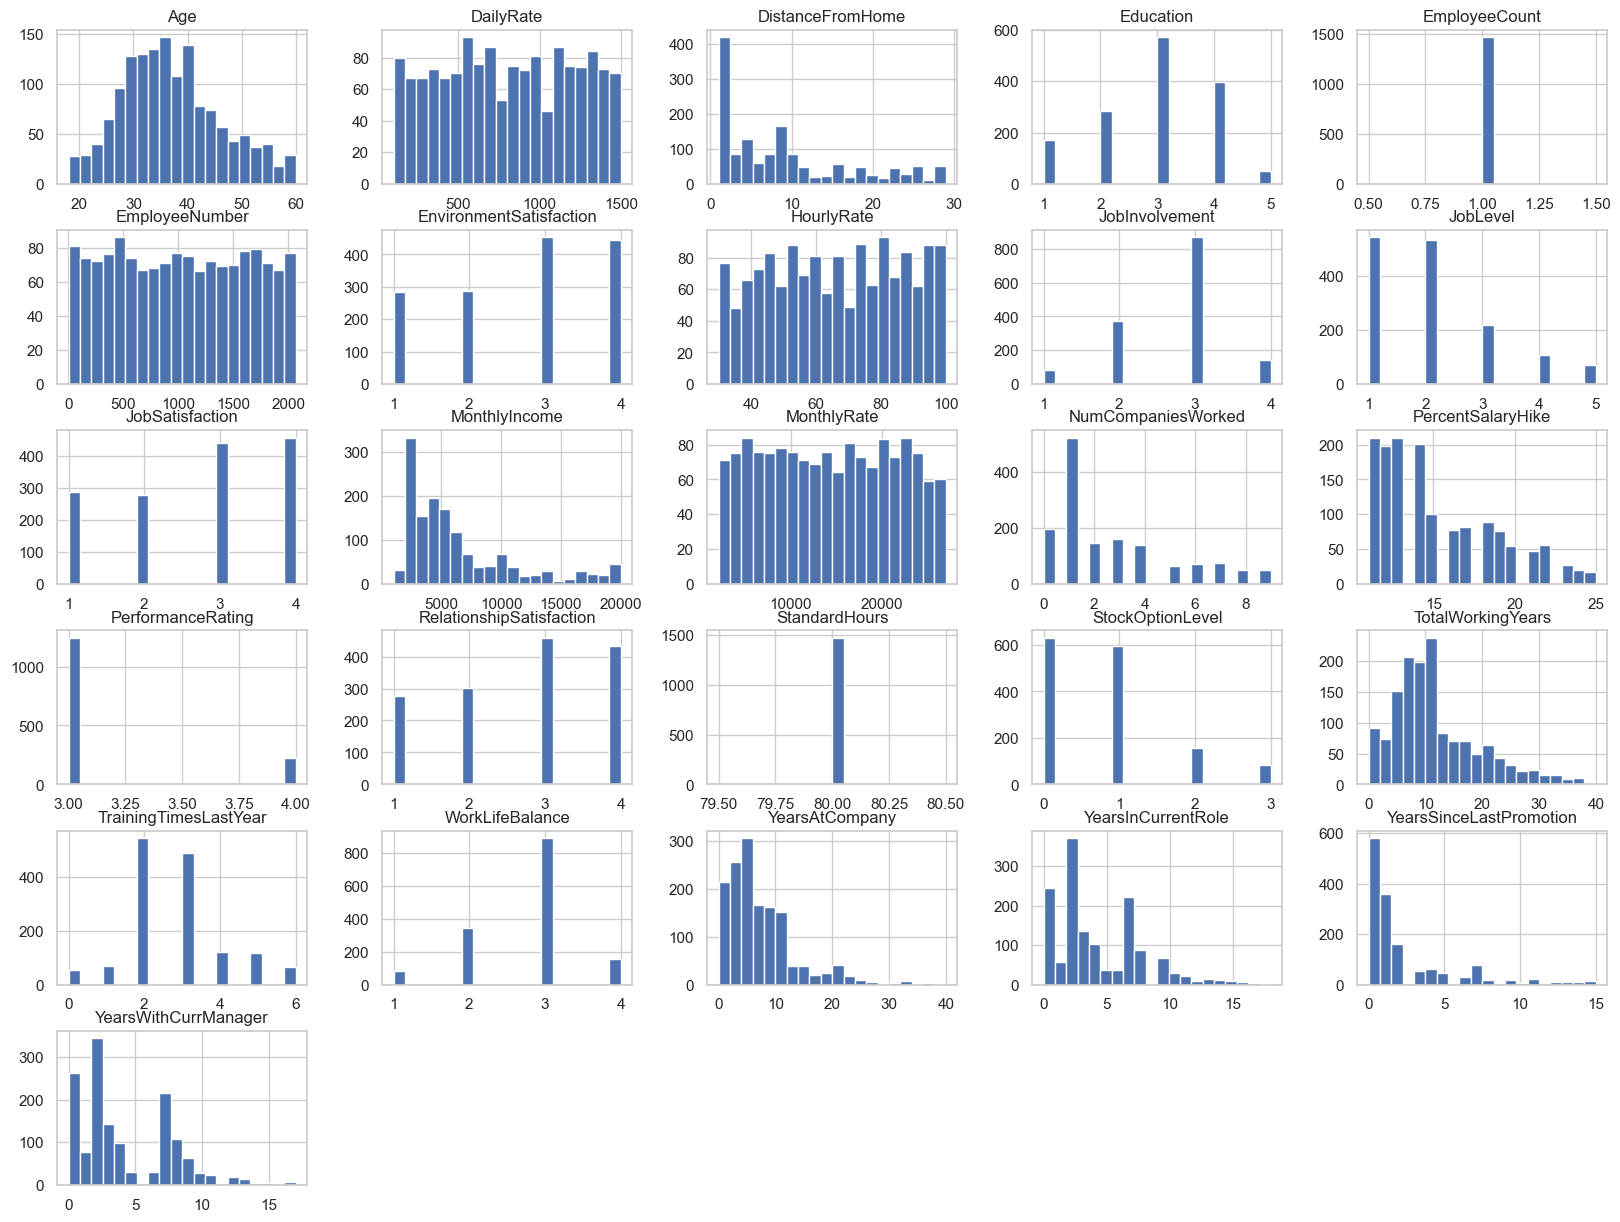

In [6]:
#Visual Exploration:
sns.set(style="whitegrid")
# histograms for numerical features
DF.hist(bins=20, figsize=(20, 15))
plt.show()

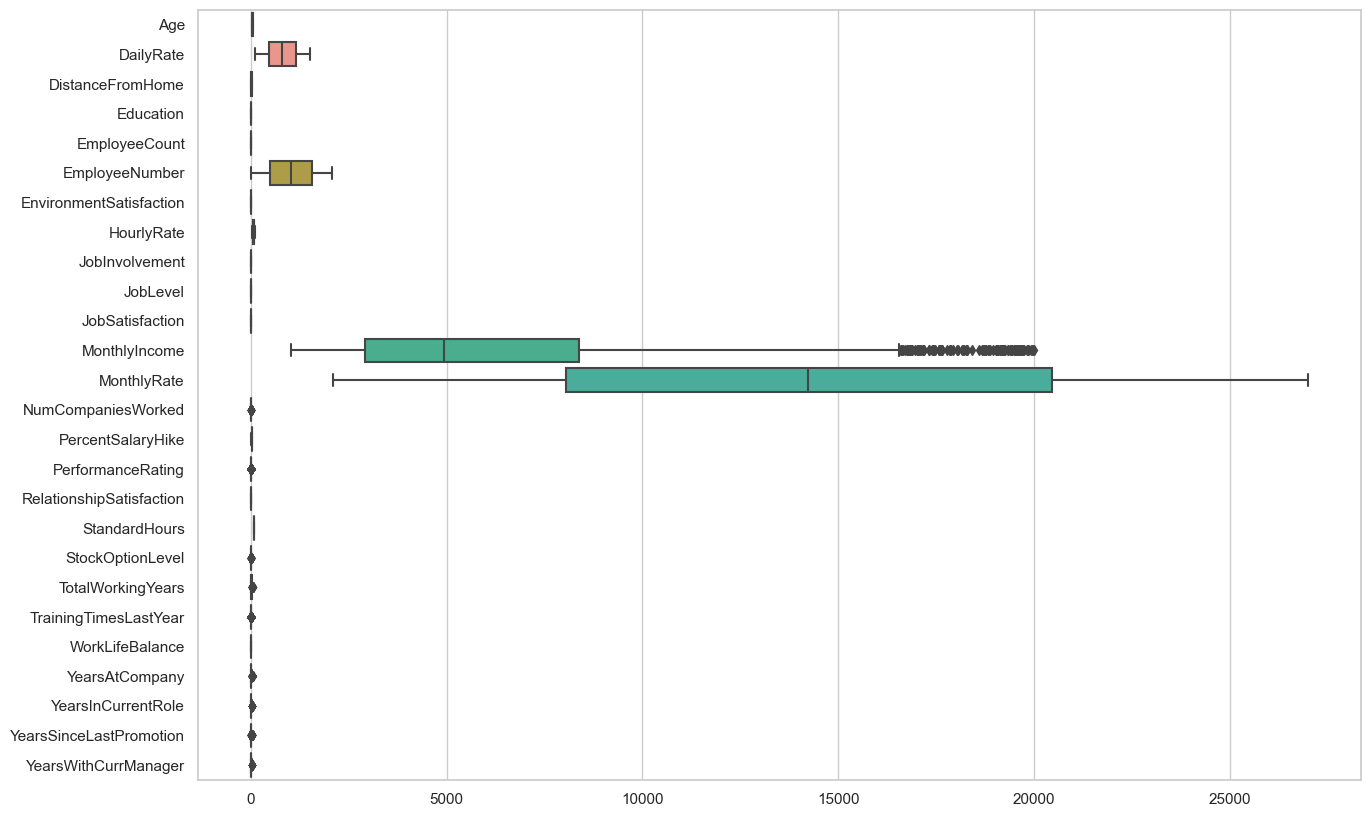

In [7]:
# box plots for numerical features
plt.figure(figsize=(15, 10))
sns.boxplot(data=DF, orient="h")
plt.show()

C:\Users\bouka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bouka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bouka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\bouka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

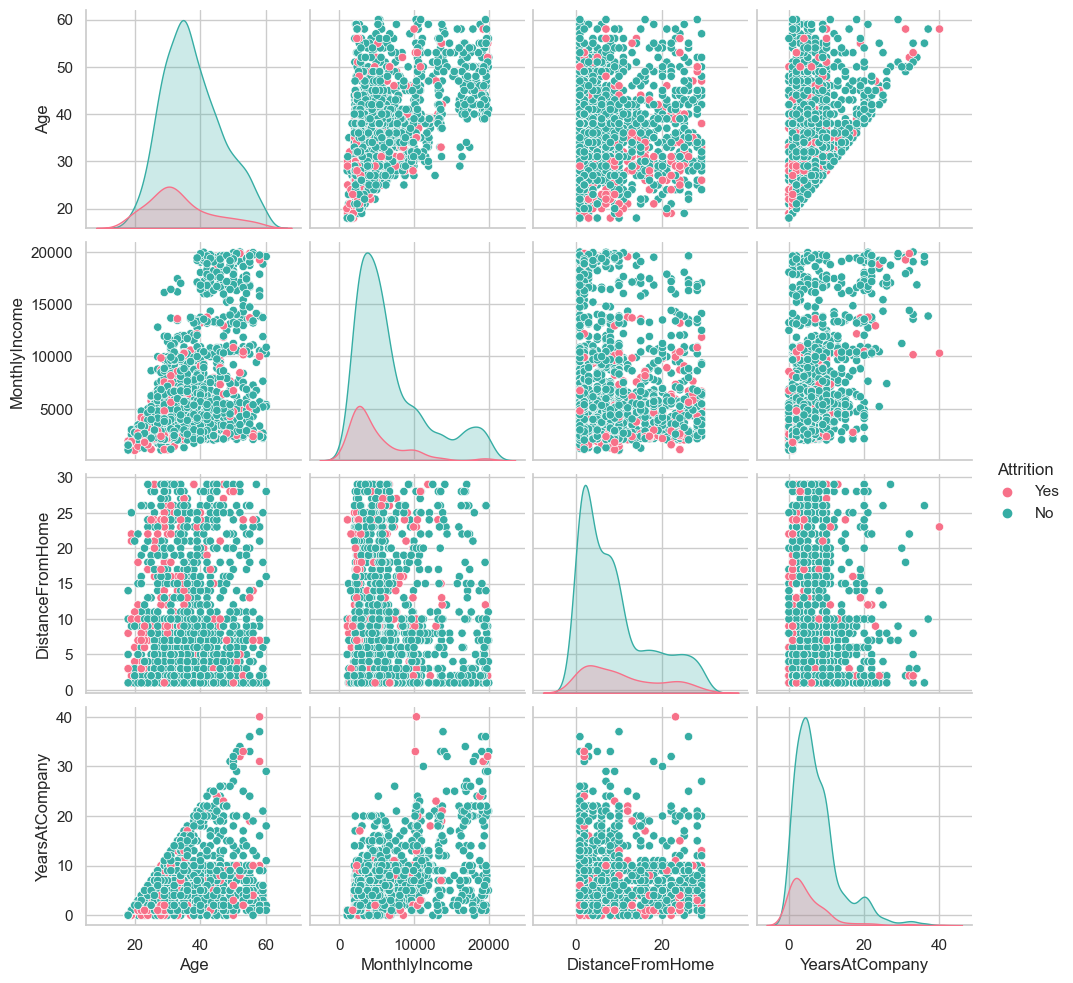

In [8]:
# pair plots for selected features
selected_features = ['Age', 'MonthlyIncome', 'DistanceFromHome', 'YearsAtCompany', 'Attrition']
sns.pairplot(DF[selected_features], hue='Attrition', palette="husl")
plt.show()

In [18]:
numerical_columns=DF.select_dtypes(include=np.number)
num_col = [] # only to store data with more that 10 unique values
for i in numerical_columns:
    if len(DF[i].value_counts())>10:
        num_col.append(i)

C:\Users\bouka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


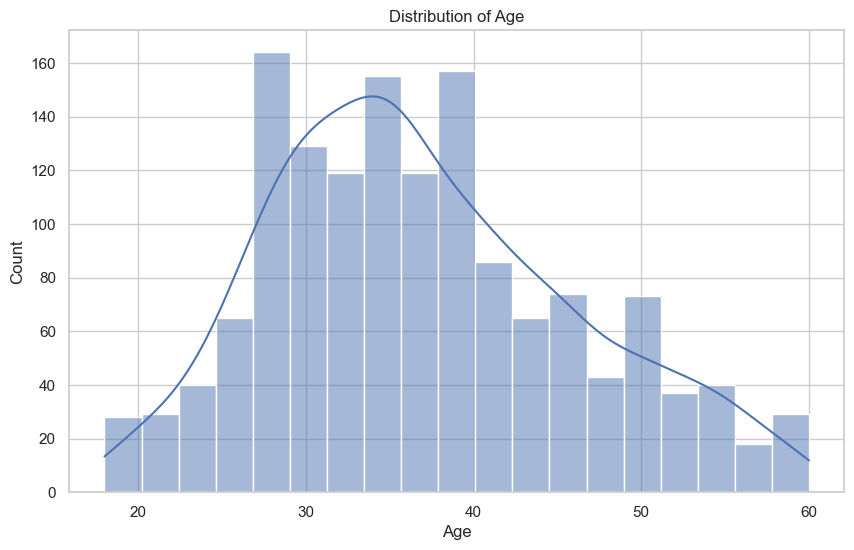

C:\Users\bouka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


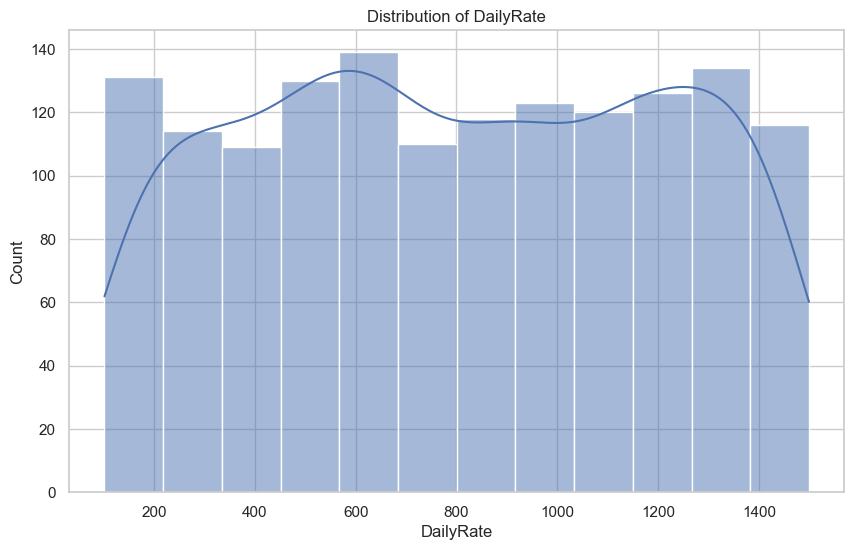

C:\Users\bouka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


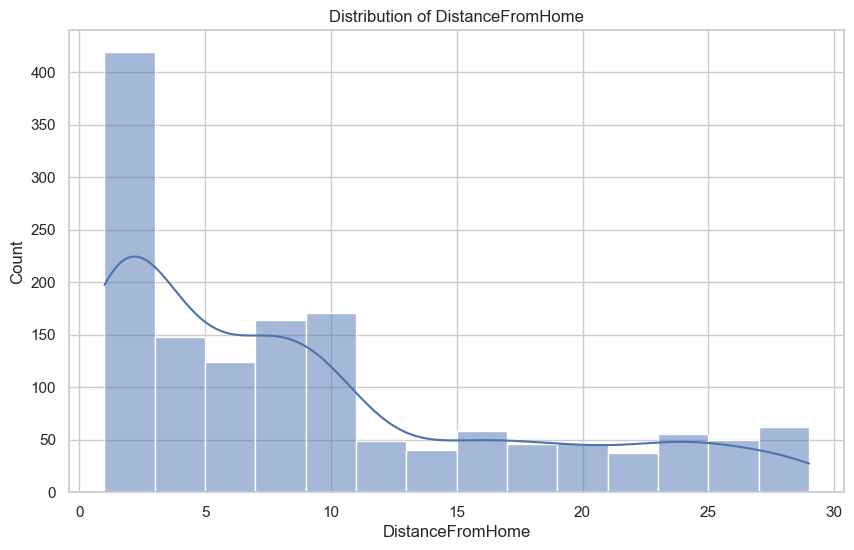

C:\Users\bouka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


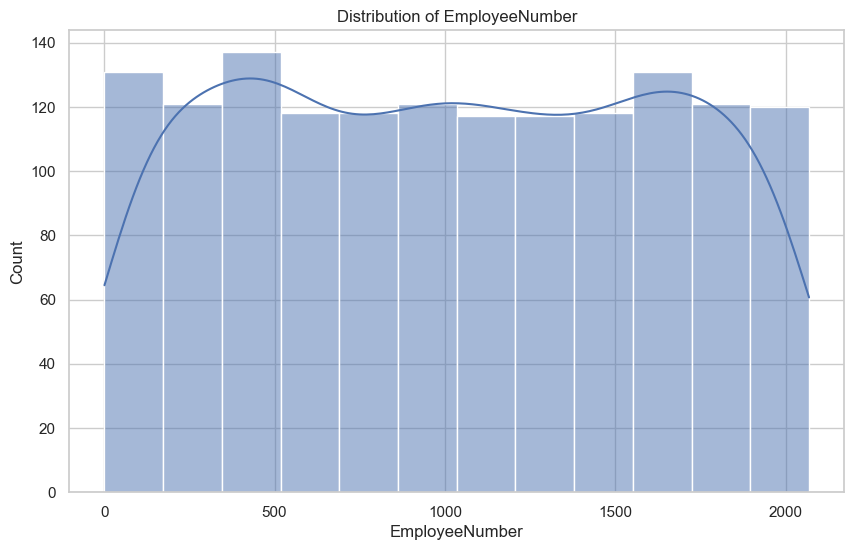

C:\Users\bouka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


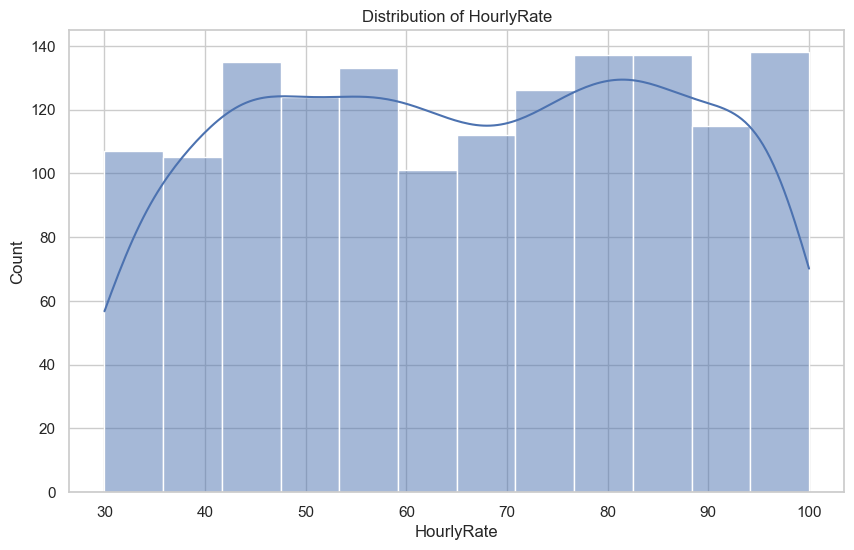

C:\Users\bouka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


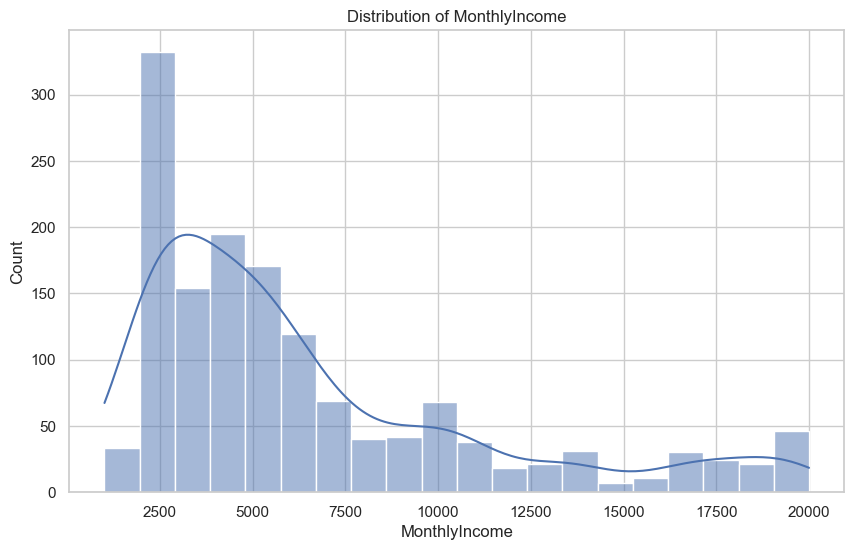

C:\Users\bouka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


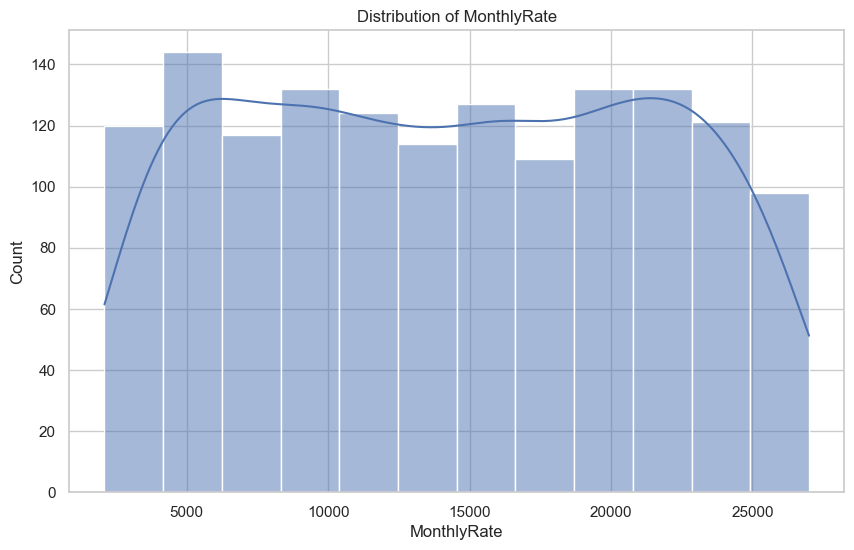

C:\Users\bouka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


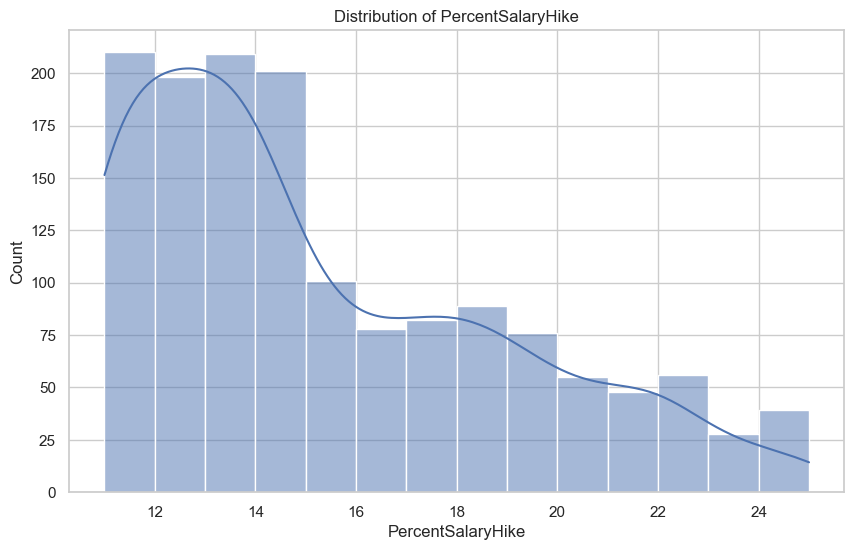

C:\Users\bouka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


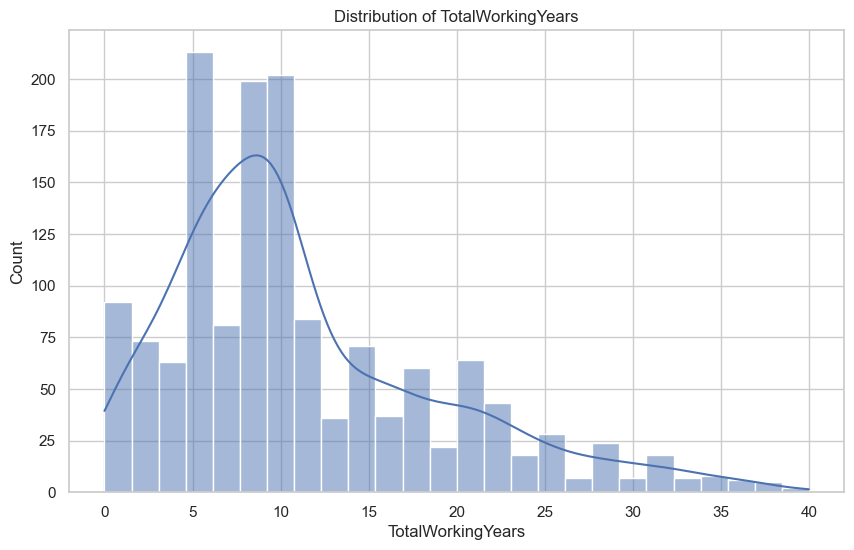

C:\Users\bouka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


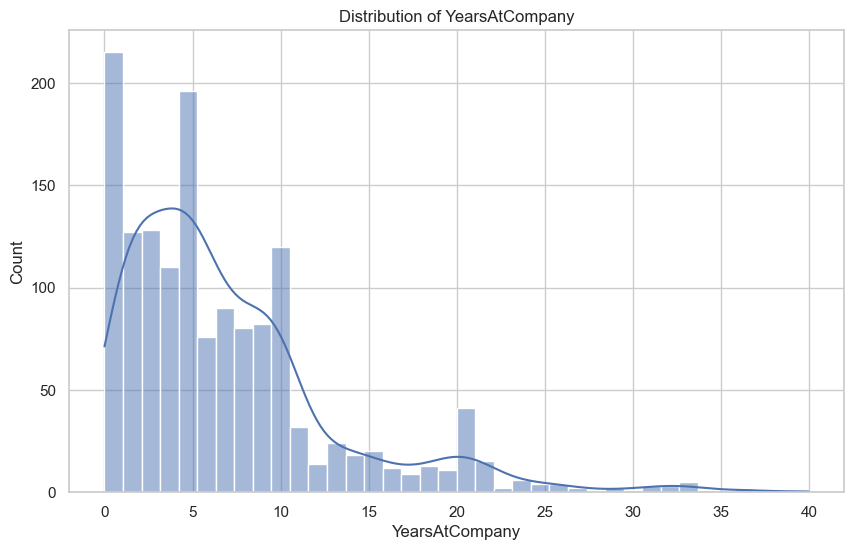

C:\Users\bouka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


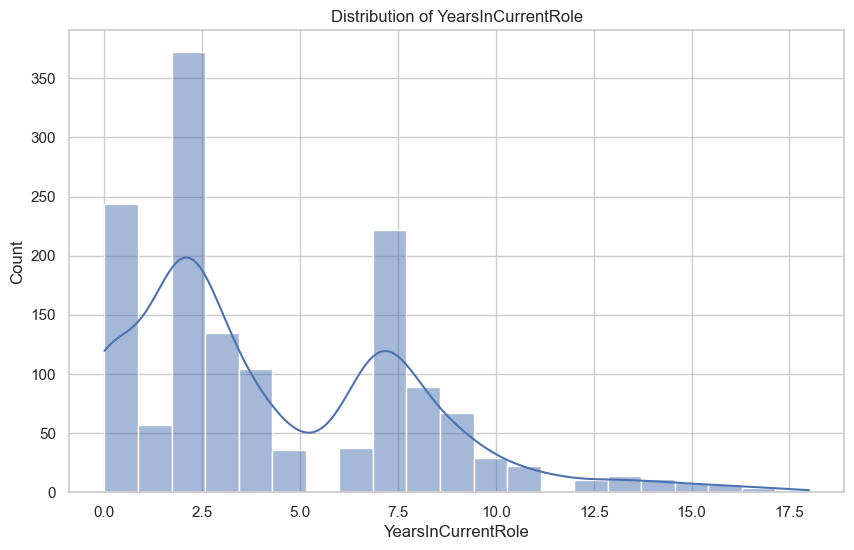

C:\Users\bouka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


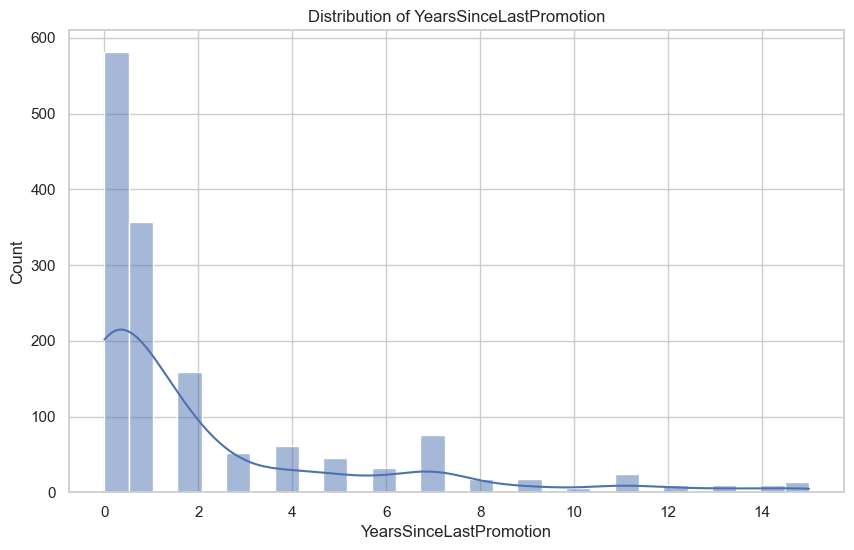

C:\Users\bouka\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


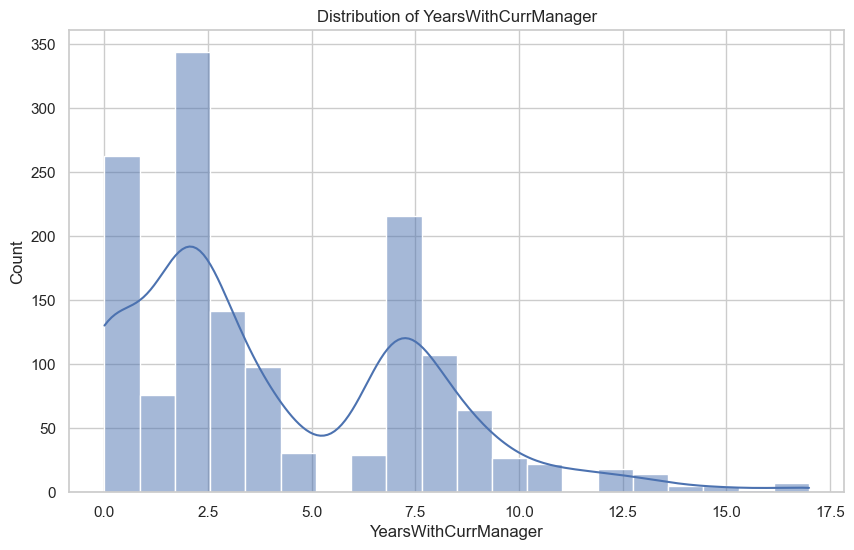

In [19]:
# Visualizing data distribution
for column in num_col:
    plt.figure(figsize=(10, 6))
    sns.histplot(DF[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

From the above plots, we can interpret the following:

Most employees are in the 30 to 40 age group.  
Fewer than 50 people earn more than $20,000.  
Fewer than 50 people received a raise of more than 20%.  
The average tenure of employees is between 0 to 5 years.  
Most data distributions are right-skewed.  
Employees with over 10 years of service have a low attrition rate.  
The highest attrition occurs within the first year of employment

In [20]:
cat_columns = DF.select_dtypes(exclude=np.number)

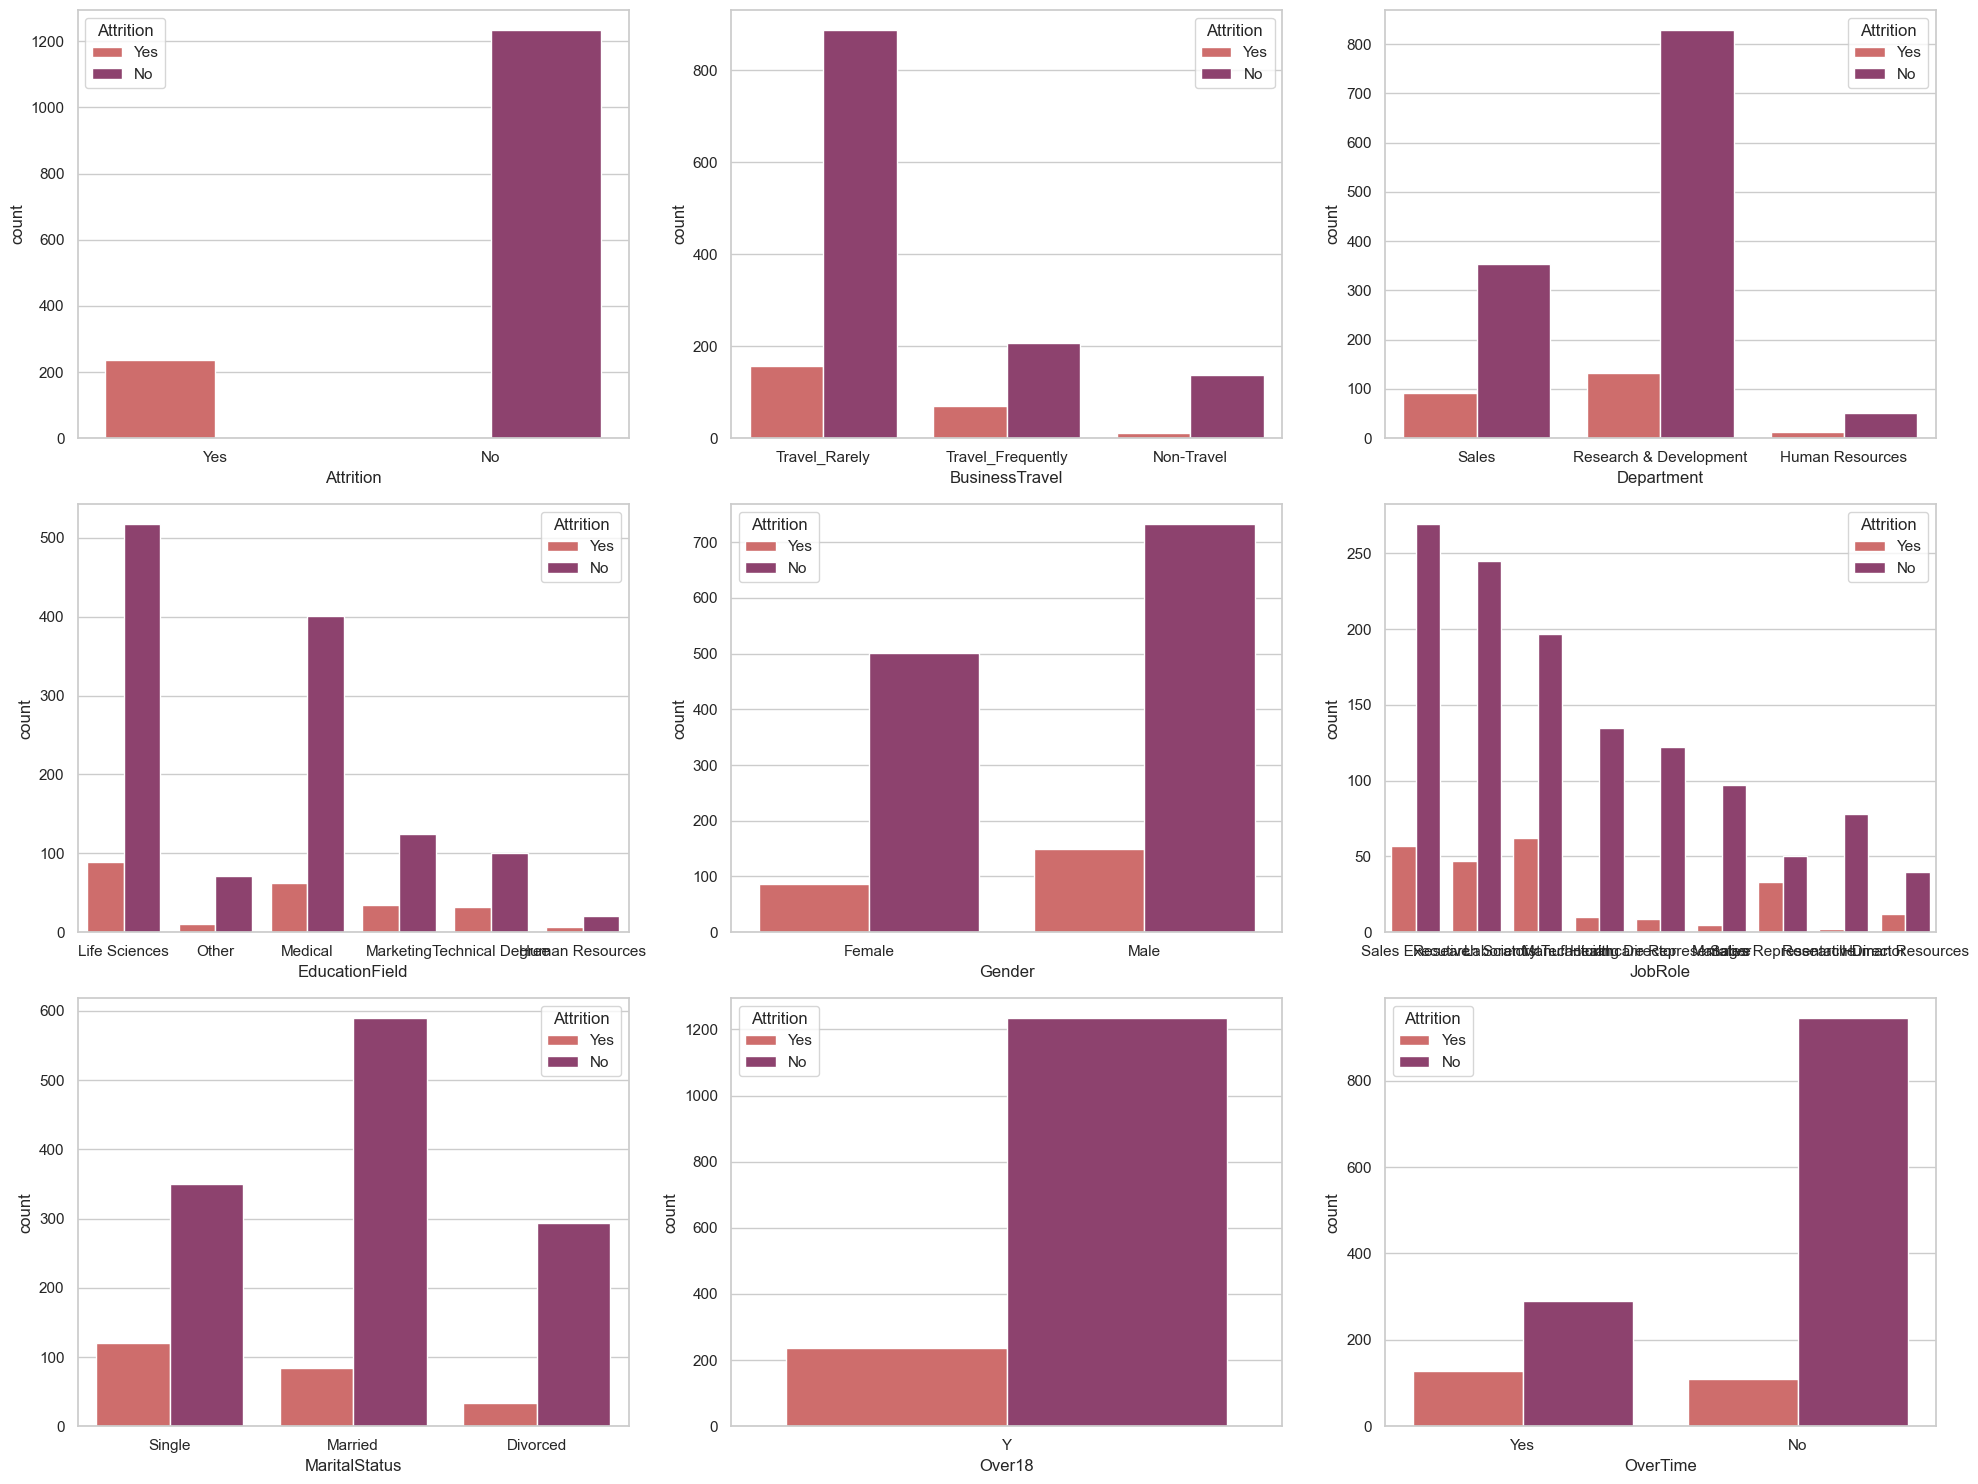

In [21]:
#Visualizing and analysis of categorical data
plt.figure(figsize=(20, 15))
for i, col in enumerate(cat_columns, 1):
        plt.subplot(3,3, i)
        sns.countplot(data=DF,x=col,hue='Attrition',palette = 'flare')
        plt.xlabel(col)
plt.tight_layout()
plt.savefig('univariate_numerical.png')
plt.show()

From the above plot, we can observe the following:

- The target variable shows a class imbalance.
- Infrequent travelers have a higher attrition rate.
- Male employees are more likely to experience attrition compared to female employees.
- Employees who work overtime are more prone to attrition.
- The highest attrition rates are in the Sales and Research & Development departments.

In [22]:
#creating count plot and Sort the values for the second subplot to match the order of the first subplot
def count_percent_plot(DF, col, hue):

    plt.figure(figsize=(13.5, 8))
    plt.subplot(1, 2, 1)
    value_1 = DF[col].value_counts()
    sns.barplot(x=value_1.index, y=value_1.values, order=value_1.index, palette='Set2')
    plt.title(f"Employees by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_1.values):
        count_percentage = "{:.1f}%".format((value / len(DF)) * 100)
        plt.text(index, value, f"{value} ({count_percentage})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)

    value_2 = DF[DF[hue] == 'Yes'][col].value_counts().reindex(value_1.index)

    plt.subplot(1, 2, 2)
    attrition_rate = (value_2 / value_1 * 100).values
    sns.barplot(x=value_2.index, y=value_2.values, order=value_1.index, palette='Set2')
    plt.title(f"Employee Attrition by {col}", fontweight="black", size=14, pad=15)
    for index, value in enumerate(value_2.values):
        attrition_percentage = "{:.1f}%".format(np.round(attrition_rate[index], 1))
        plt.text(index, value, f"{value} ({attrition_percentage})", ha="center", va="bottom", size=10)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

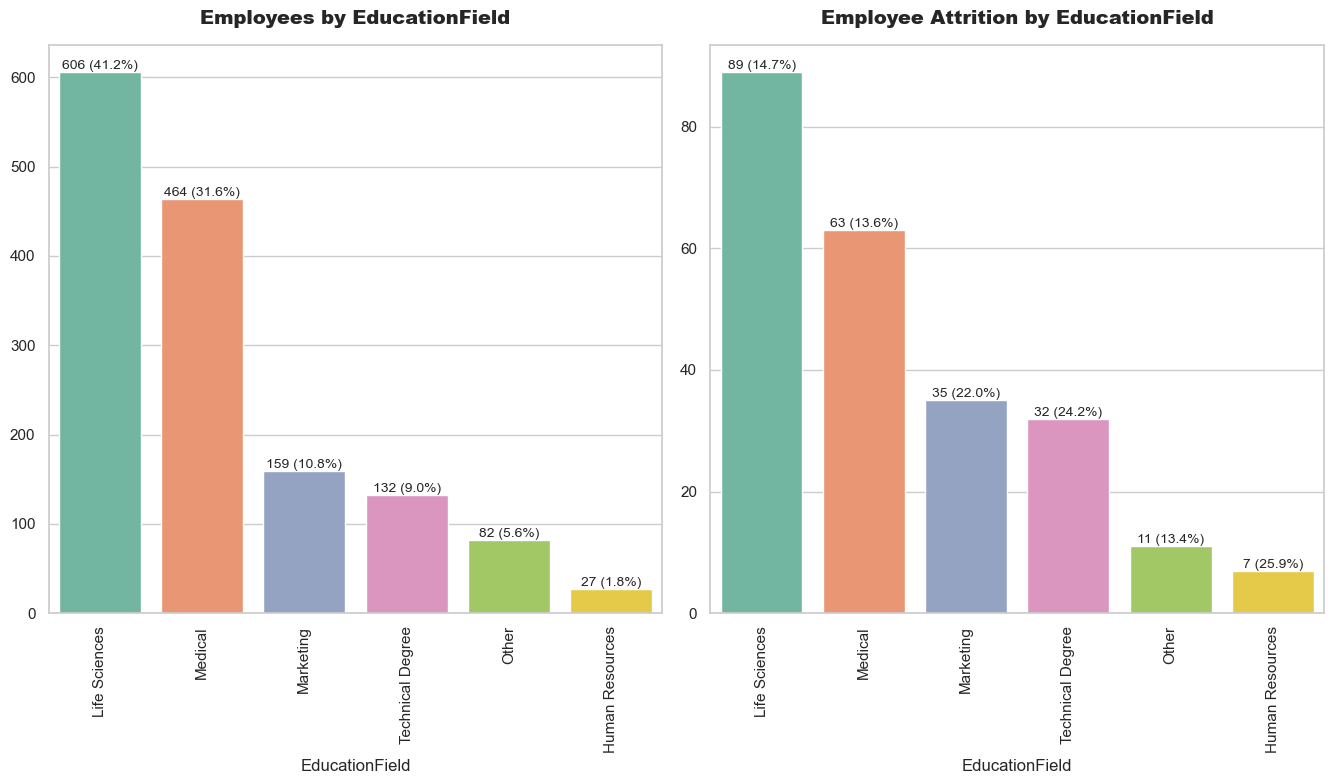

In [23]:
count_percent_plot(DF, 'EducationField', 'Attrition')

Majority employees come from the Life Science or Medical education fields, while very few are from Human Resources.  
Education fields such as Human Resources, Technical, and Marketing have very high attrition rates.  
This could be due to workload, as these fields have fewer employees compared to those with lower attrition rates.

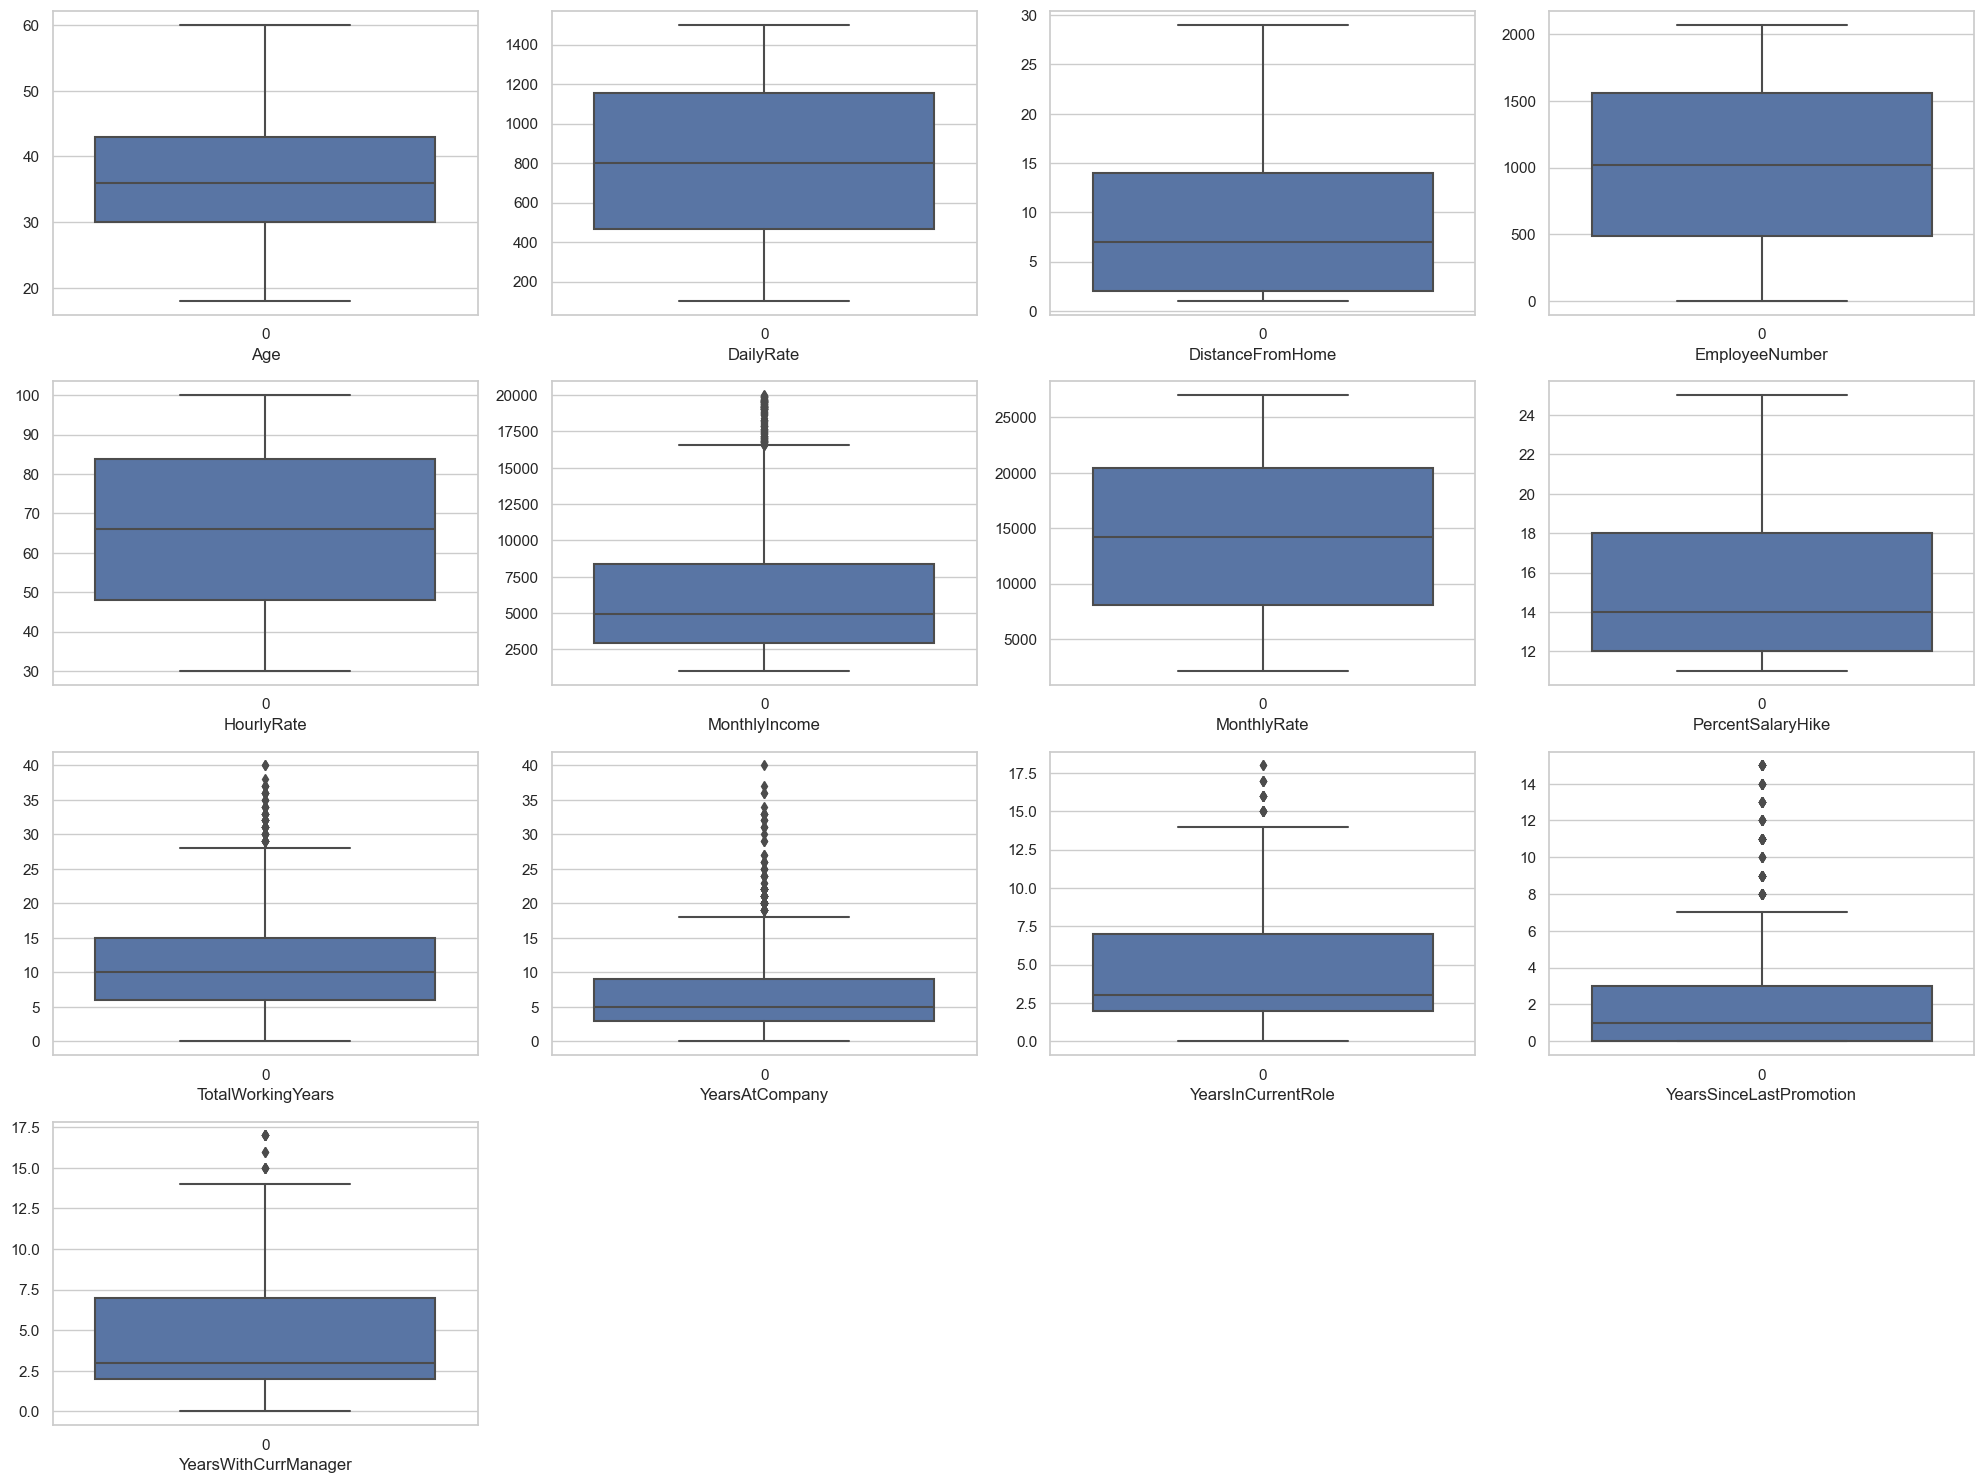

In [24]:
#Checking  for outliers
plt.figure(figsize=(20, 15))
for i, col in enumerate(num_col, 1):
        plt.subplot(4,4, i)
        sns.boxplot(DF[col])
        plt.xlabel(col)
plt.tight_layout()
plt.savefig('univariate_numerical.png')
plt.show()

## 1.2 Data Cleaning

In [25]:
# remove Irrelevant Columns
DF.drop(columns=['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], inplace=True)


In [26]:
DF

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [27]:
#  identify duplicate value 
DF.duplicated().sum()

0

In [28]:
#  identify miss values 
print("\nMissing Values:")
print(DF.isnull().sum())


Missing Values:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


## 1.3 Data Encoding:

In [29]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for binary categorical variables
label_encoder = LabelEncoder()
DF['Gender'] = label_encoder.fit_transform(DF['Gender'])
DF['OverTime'] = label_encoder.fit_transform(DF['OverTime'])

# One-Hot Encoding for multi-category variables
DF = pd.get_dummies(DF, columns=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'])

## 1.4 Data labeling :

In [30]:
# Binary Encoding for the target variable
DF['Attrition'] = label_encoder.fit_transform(DF['Attrition'])

print(DF['Attrition'].head())

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32


In [31]:
DF

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,...,False,False,False,False,False,True,False,False,False,True
1,49,0,279,8,1,3,1,61,2,2,...,False,False,False,False,True,False,False,False,True,False
2,37,1,1373,2,2,4,1,92,2,1,...,True,False,False,False,False,False,False,False,False,True
3,33,0,1392,3,4,4,0,56,3,1,...,False,False,False,False,True,False,False,False,True,False
4,27,0,591,2,1,1,1,40,3,1,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,1,41,4,2,...,True,False,False,False,False,False,False,False,True,False
1466,39,0,613,6,1,4,1,42,2,3,...,False,False,False,False,False,False,False,False,True,False
1467,27,0,155,4,3,2,1,87,4,2,...,False,False,True,False,False,False,False,False,True,False
1468,49,0,1023,2,3,4,1,63,2,2,...,False,False,False,False,False,True,False,False,True,False


##  1.5 Correlation Matrix:

After completing data cleaning and encoding, i will calculate and visualize the correlation matrix:

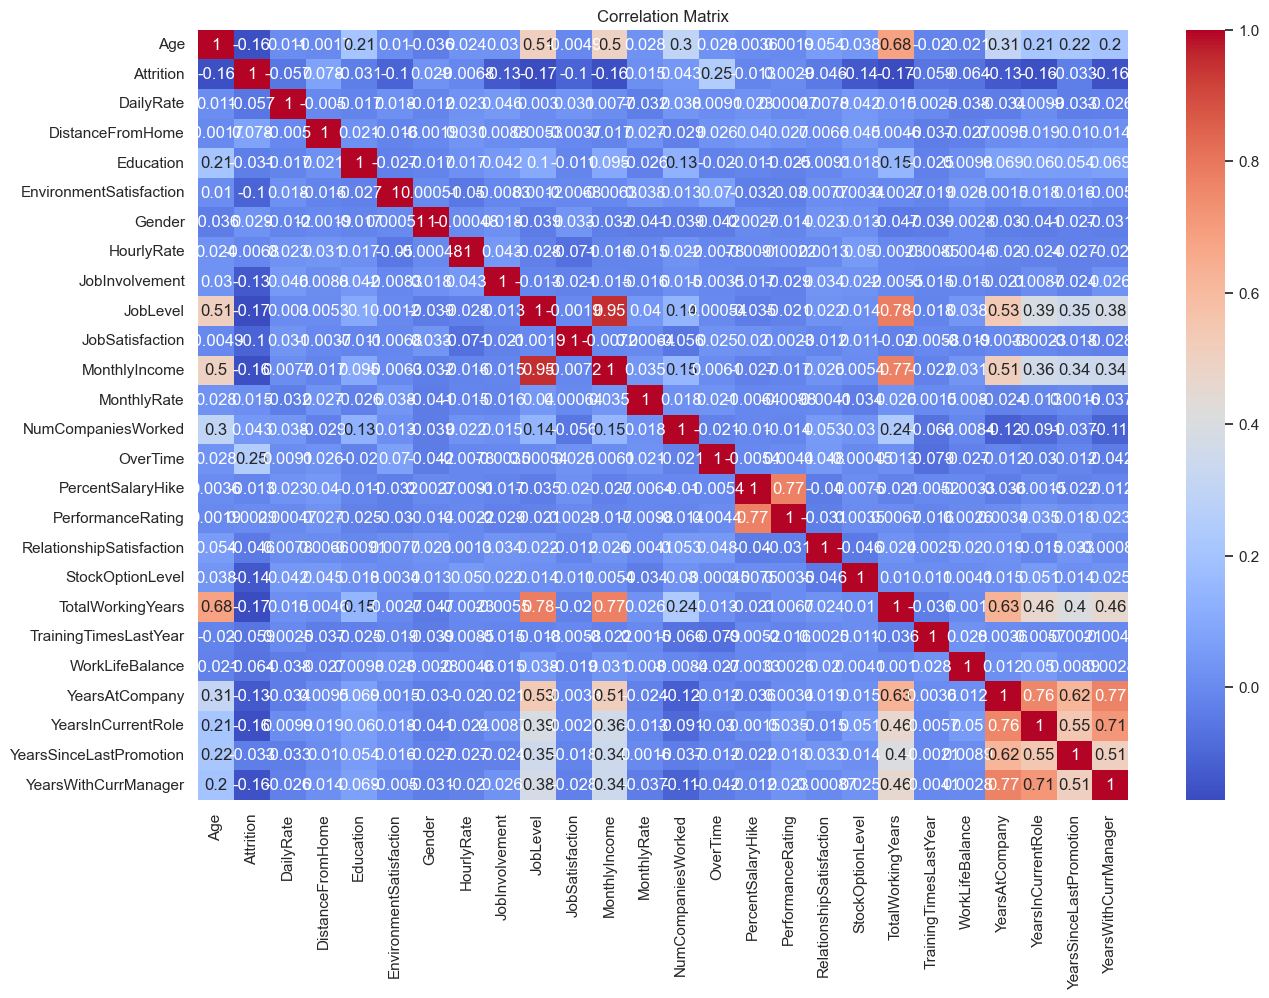

In [32]:
# Ensure all columns used in the correlation matrix are numeric
numeric_df = DF.select_dtypes(include=[float, int])

# Correlation matrix
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 1.6 Balance the data: 

on this side of  balanced data we gonna balace data to ensure that the machine learning model performs well across all classes, preventing bias towards more frequent classes and improving overall accuracy and fairness.

In [33]:
X = DF.drop(columns='Attrition')  # independent features
y= DF['Attrition'] # target variable

In [34]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)
print("Before applying smoote" , y.value_counts())
print()
print("After smoote applied" , y_smote.value_counts())

Before applying smoote Attrition
0    1233
1     237
Name: count, dtype: int64

After smoote applied Attrition
1    1233
0    1233
Name: count, dtype: int64


## 1.7 Feature Scaling:

In [35]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_smote)

# 2. Building Machine Learning Models :

## 2.1 data spliting phase :

- Split the UnScaled Data into Training and Test 

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

- Split the scaled Data into Training and Test 

In [67]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_scaled, y_smote, test_size=0.2, random_state=42)


In [68]:

x_train1_scale =scaler.fit_transform(x_train1)
x_test1_scale =scaler.transform(x_test1)


## 2.2 Machine learning algorithms:

In [69]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score


In [71]:
models = [
    LogisticRegression(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    XGBClassifier()
]


In [72]:
# storing the results
training_score = []
testing_score = []
Roc_Auc_score = []
f1_score_ = []

## 2.3  Model training and evaluation:

### 2.3.1 Model training and evaluation on scaled data : 

In [73]:

def model_prediction(model):
    model.fit(x_train1,y_train1)
    x_train_pred1 = model.predict(x_train1_scale)
    x_test_pred1 = model.predict(x_test1_scale)
    y_test_prob1 = model.predict_proba(x_test1_scale)[:, 1]
    a = accuracy_score(y_train1,x_train_pred1)*100
    b = accuracy_score(y_test1,x_test_pred1)*100
    c = roc_auc_score(y_test1, y_test_prob1)
    d = f1_score(y_test1,x_test_pred1)

    training_score.append(a)
    testing_score.append(b)
    Roc_Auc_score.append(c)
    f1_score_.append(d)


    print("\n------------------------------------------------------------------------")
    print(f"Accuracy_Score of {model} model on scaled Trainset  :",a)
    print(f"Accuracy_Score of {model} model on scaled Testset :",b)
    print(f"ROC_AUC Score of {model} model is:", c)
    print(f"f1 Score of {model} model is:", d)

    print("\n------------------------------------------------------------------------")
    print(f"Classification Report of {model} model is:")
    print(classification_report(y_test1,x_test_pred1))

    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test1,x_test_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()


------------------------------------------------------------------------
Accuracy_Score of LogisticRegression() model on scaled Trainset  : 92.79918864097363
Accuracy_Score of LogisticRegression() model on scaled Testset : 92.91497975708502
ROC_AUC Score of LogisticRegression() model is: 0.9706721311475409
f1 Score of LogisticRegression() model is: 0.9256900212314225

------------------------------------------------------------------------
Classification Report of LogisticRegression() model is:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       250
           1       0.96      0.89      0.93       244

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494


------------------------------------------------------------------------
Confusion Matrix of LogisticRegression() model is:


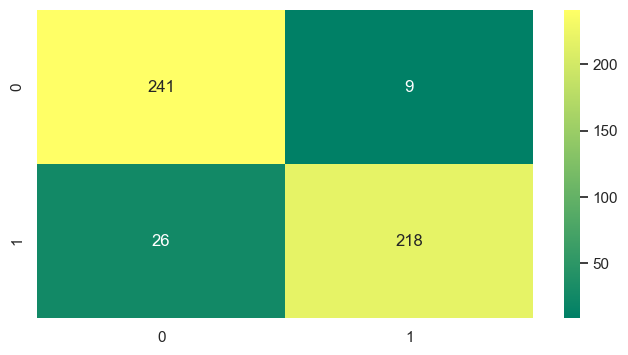

In [74]:
# LogisticRegression 
model_prediction(LogisticRegression())



------------------------------------------------------------------------
Accuracy_Score of KNeighborsClassifier() model on scaled Trainset  : 94.52332657200812
Accuracy_Score of KNeighborsClassifier() model on scaled Testset : 92.91497975708502
ROC_AUC Score of KNeighborsClassifier() model is: 0.9748114754098361
f1 Score of KNeighborsClassifier() model is: 0.9295774647887324

------------------------------------------------------------------------
Classification Report of KNeighborsClassifier() model is:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       250
           1       0.91      0.95      0.93       244

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494


------------------------------------------------------------------------
Confusion Matrix of KNeighborsClassifier() model is:


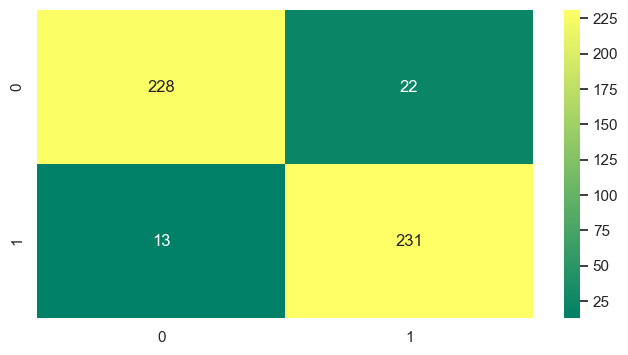

In [75]:
#KNeighborsClassifier
model_prediction(KNeighborsClassifier())

### 2.3.2 Model training and evaluation on unscaled data:

In [76]:
def model_prediction(model):
    model.fit(x_train,y_train)
    x_train_pred1 = model.predict(x_train)
    x_test_pred1 = model.predict(x_test)
    y_test_prob1 = model.predict_proba(x_test)[:, 1]
    a = accuracy_score(y_train,x_train_pred1)*100
    b = accuracy_score(y_test,x_test_pred1)*100
    c = roc_auc_score(y_test, y_test_prob1)
    d = f1_score(y_test,x_test_pred1)

    training_score.append(a)
    testing_score.append(b)
    Roc_Auc_score.append(c)
    f1_score_.append(d)


    print("\n------------------------------------------------------------------------")
    
    print(f"Accuracy_Score of {model} model on unscaled Trainset:",a)
    print(f"Accuracy_Score of {model} model on unscaled Testset:",b)
    print(f"ROC_AUC Score of {model} model is:", c)
    print(f"f1 Score of {model} model is:", d)

    print("\n------------------------------------------------------------------------")
    
    print(f"Classification Report of {model} model is:")
    print(classification_report(y_test1,x_test_pred1))

    print("\n------------------------------------------------------------------------")
    
    print(f"Confusion Matrix of {model} model is:")
    cm = confusion_matrix(y_test1,x_test_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()


------------------------------------------------------------------------
Accuracy_Score of RandomForestClassifier() model on unscaled Trainset: 100.0
Accuracy_Score of RandomForestClassifier() model on unscaled Testset: 92.71255060728745
ROC_AUC Score of RandomForestClassifier() model is: 0.9773114754098361
f1 Score of RandomForestClassifier() model is: 0.9234042553191489

------------------------------------------------------------------------
Classification Report of RandomForestClassifier() model is:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       250
           1       0.96      0.89      0.92       244

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494


------------------------------------------------------------------------
Confusion Matrix of RandomForestClassifier() model is:


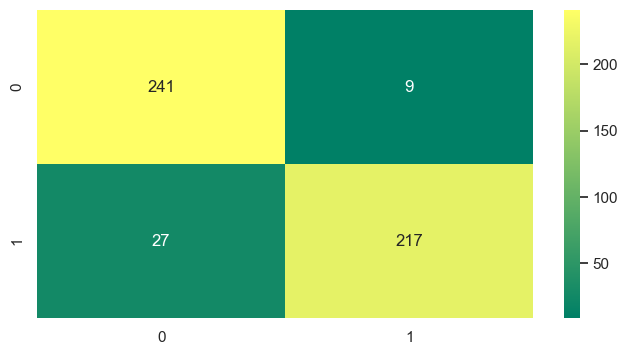

In [77]:
#RandomForestClassifier

rf=RandomForestClassifier()
model_prediction(rf)



------------------------------------------------------------------------
Accuracy_Score of GradientBoostingClassifier() model on unscaled Trainset: 96.39959432048681
Accuracy_Score of GradientBoostingClassifier() model on unscaled Testset: 92.71255060728745
ROC_AUC Score of GradientBoostingClassifier() model is: 0.9641311475409836
f1 Score of GradientBoostingClassifier() model is: 0.9224137931034483

------------------------------------------------------------------------
Classification Report of GradientBoostingClassifier() model is:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       250
           1       0.97      0.88      0.92       244

    accuracy                           0.93       494
   macro avg       0.93      0.93      0.93       494
weighted avg       0.93      0.93      0.93       494


------------------------------------------------------------------------
Confusion Matrix of GradientBoostingClassifier() model is

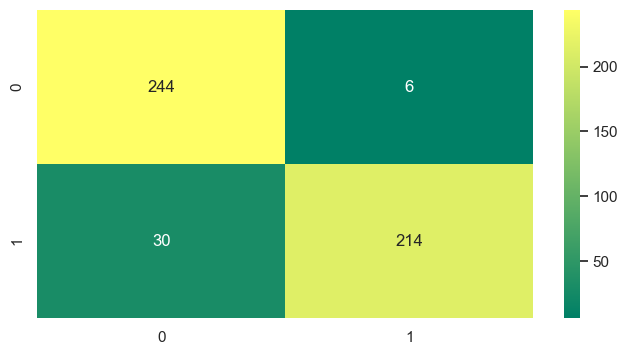

In [78]:
#GradientBoostingClassifier
model_prediction(GradientBoostingClassifier())


------------------------------------------------------------------------
Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) model on unscaled Trainset: 100.0
Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None,

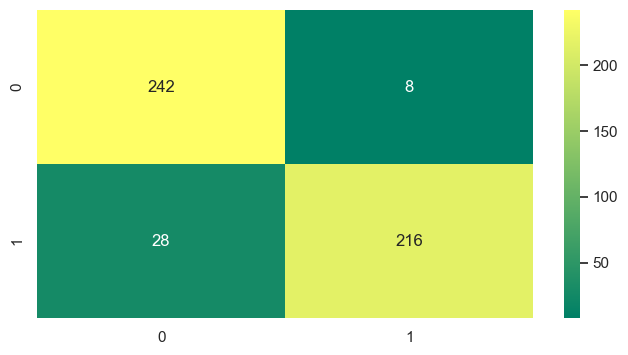

In [79]:
#XGBClassifier
model_prediction(XGBClassifier())

In [81]:

models=[LogisticRegression(),KNeighborsClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),XGBClassifier()]
results=pd.DataFrame({'Algorithm':models,'Training_accuracy':training_score,'Testing_accuracy':testing_score,'Roc_Auc_score':Roc_Auc_score,'f1_score':f1_score_})
results




,Algorithm,Training_accuracy,Testing_accuracy,Roc_Auc_score,f1_score
0,LogisticRegression(),92.799189,92.914980,0.970672,0.925690
1,KNeighborsClassifier(),94.523327,92.914980,0.974811,0.929577
2,RandomForestClassifier(),100.000000,92.712551,0.977311,0.923404
3,GradientBoostingClassifier(),96.399594,92.712551,0.964131,0.922414
4,"XGBClassifier(base_score=None, booster=None, c...",100.000000,92.712551,0.972754,0.923077


# Sumrray of results :

Based on the results  provided above :

1. Accuracy Scores:

- Training accuracy is very high for most models, indicating that they fit the training data well.
- Testing accuracy is also quite high across the board, suggesting that the models generalize reasonably well to unseen data.
2. ROC AUC Score:
- ROC AUC scores measure the ability of the model to distinguish between classes. Higher ROC AUC scores generally indicate better model performance in terms of classification.
- Random Forest and Gradient Boosting classifiers have slightly higher ROC AUC scores compared to others, indicating better discrimination ability.
3. F1 Score:

- F1 score balances precision and recall, providing a single metric that considers both false positives and false negatives.
- KNeighborsClassifier and XGBClassifier show slightly higher F1 scores, indicating better overall performance in terms of precision and recall.
#### Best Model Selection:
- Based on F1 Score: The KNeighborsClassifier and XGBClassifier appear to have the highest F1 scores, suggesting they strike a good balance between precision and recall.

- Based on ROC AUC Score: The RandomForestClassifier and GradientBoostingClassifier show slightly higher ROC AUC scores, indicating better overall classification performance in terms of distinguishing between classes.

### Conclusion:
- If  primary concern is a balance between precision and recall (F1 score),we  consider the KNeighborsClassifier and XGBClassifier.
- If prioritize the model's ability to distinguish between classes (ROC AUC score),we gonna  focus on the RandomForestClassifier and GradientBoostingClassifier.

## Proceeding with Random forest classifier through Hyperparameter Tuning.

In [82]:
params ={'n_estimators': [100, 200, 300],
        'max_depth': [3,5,10],              
         'min_samples_split': [2, 5, 10],
         'min_samples_leaf': [1, 2, 4]}

In [83]:
rfc=RandomForestClassifier()
rf_gs=GridSearchCV(rfc,params)
rf_gs.fit(x_train,y_train)
print("Best Parameters:", rf_gs.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


## Final Model with best Hyperparameter Tuning:

training our final model and evaluet its results by using K-Fold cross validation 

In [85]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score # Import the necessary metrics
kfold=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)

#storing results
accuracy_scores = []
f1_scores = []
precision_scores = []
aucroc=[]

#initialising the model with besthyper parametrs
rfc_tunes=RandomForestClassifier(max_depth= 10,min_samples_leaf= 1, min_samples_split= 2, n_estimators=300)

for train_data, test_data in kfold.split(X_smote, y_smote):
  x_train_cv, x_test_cv = X_smote.iloc[train_data], X_smote.iloc[test_data]
  y_train_cv, y_test_cv = y_smote.iloc[train_data], y_smote.iloc[test_data]

  #fit data for each cv
  rfc_tunes.fit(x_train_cv,y_train_cv)
  y_pred_cv=rfc_tunes.predict(x_test_cv)

  # Calculate metrics for this fold
  accuracy_scores.append(accuracy_score(y_test_cv, y_pred_cv))
  f1_scores.append(f1_score(y_test_cv, y_pred_cv))
  precision_scores.append(precision_score(y_test_cv, y_pred_cv))
  aucroc.append(roc_auc_score(y_test_cv, y_pred_cv))


# Average metrics across all folds
avg_accuracy = np.mean(accuracy_scores)
avg_f1 = np.mean(f1_scores)
avg_precision = np.mean(precision_scores)
avg_aucroc=np.mean(aucroc)

print(f"accuracy score:{avg_accuracy}")
print(f"f1 score:{avg_f1}")
print(f"precision score:{avg_precision}")
print(f"aucroc score:{avg_aucroc}")

accuracy score:0.9217422073006155
f1 score:0.9191660925444569
precision score:0.9500508546177475
aucroc score:0.9217545239968528


After employing optimal hyperparameter tuning, the finalRandom forest classifier achieved an accuracy score of 0.9217, an F1 score of 0.9192, a precision score of 0.9501, and an AUC ROC score of 0.9218.  
These results demonstrate the model's robust performance and its ability to effectively classify the data.  
With such strong metrics, this model is well-generalized and suitable for deployment in production.  
Saving the model ensures that its trained parameters are preserved for future use, maintaining its predictive capabilities over time.

## saving the final model

In [87]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(rfc_tunes, f)
